In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb

import pickle

In [2]:
def plot_normalized_stacked_bar(df, characteristic, category, bins=5):
    """
    Plots a normalized stacked bar chart for a given characteristic and categorical variable.
    
    Parameters:
    - df (DataFrame): The pandas DataFrame containing the data.
    - characteristic (str): The column name for the numeric characteristic to bin (e.g., 'relspeed').
    - category (str): The column name for the categorical variable to compare (e.g., 'eventtype').
    - bins (int): The number of bins to divide the characteristic into.
    """
    # Bin the characteristic into categories (you can adjust the number of bins)
    df[f'{characteristic}_bin'] = pd.cut(df[characteristic], bins=bins)

    # Create a pivot table for the stacked bar chart with normalized values
    stacked_data = df.pivot_table(index=f'{characteristic}_bin', columns=category, aggfunc='size', fill_value=0)

    # Normalize by dividing by the sum across each bin (row-wise normalization)
    stacked_data_normalized = stacked_data.div(stacked_data.sum(axis=1), axis=0)

    # Plot the normalized stacked bar chart
    stacked_data_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Normalized Stacked Bar Chart: {characteristic.capitalize()} Bins vs {category.capitalize()} (Proportions)')
    plt.xlabel(f'{characteristic.capitalize()} Bins')
    plt.ylabel('Proportion of Events')
    plt.legend(title=category.capitalize())
    plt.show()

# Example usage:
# plot_normalized_stacked_bar(df, 'relspeed', 'eventtype', bins=5)

In [3]:
baseball_df = pd.read_pickle("data/aggregated_data.pkl")

In [4]:
baseball_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
97305,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,1,1,1.0,0,0.0,0.0,...,-4.785487,-1.635034,-0.637811,2.616580,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park
97305,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,1,1,1.0,0,0.0,0.0,...,-4.785487,-1.635034,-0.637811,2.616580,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park
97305,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,1,1,1.0,0,0.0,0.0,...,-4.785487,-1.635034,-0.637811,2.616580,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park
97304,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,1,2,1.0,0,0.0,1.0,...,-12.570356,-5.199846,-0.179562,1.897783,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park
97304,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,1,2,1.0,0,0.0,1.0,...,-12.570356,-5.199846,-0.179562,1.897783,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536050,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,4,9.0,1,1.0,2.0,...,13.520254,11.462074,-1.921934,3.071086,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium
536050,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,4,9.0,1,1.0,2.0,...,13.520254,11.462074,-1.921934,3.071086,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium
536706,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,5,9.0,1,2.0,2.0,...,-7.014169,-1.064341,0.734495,2.058994,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium
536706,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,5,9.0,1,2.0,2.0,...,-7.014169,-1.064341,0.734495,2.058994,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium


In [27]:
rays_df = baseball_df[
    (baseball_df["Home"] == "Tampa Bay Rays") | (baseball_df["Visitor"] == "Tampa Bay Rays")
]
rays_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name,event_category
112473,2021/04/01/tbamlb-miamlb-1,2021-04-01 16:10:00,2021-04-01,16:10:00,1,1,1.0,0,0.0,0.0,...,11.618727,-0.826906,3.981201,146,Miami Marlins,139,Tampa Bay Rays,4169,Marlins Park,Pitch Count Event
112473,2021/04/01/tbamlb-miamlb-1,2021-04-01 16:10:00,2021-04-01,16:10:00,1,1,1.0,0,0.0,0.0,...,11.618727,-0.826906,3.981201,146,Miami Marlins,139,Tampa Bay Rays,4169,Marlins Park,Pitch Count Event
112473,2021/04/01/tbamlb-miamlb-1,2021-04-01 16:10:00,2021-04-01,16:10:00,1,1,1.0,0,0.0,0.0,...,11.618727,-0.826906,3.981201,146,Miami Marlins,139,Tampa Bay Rays,4169,Marlins Park,Pitch Count Event
112474,2021/04/01/tbamlb-miamlb-1,2021-04-01 16:10:00,2021-04-01,16:10:00,1,2,1.0,0,1.0,0.0,...,13.445349,-0.478611,2.912800,146,Miami Marlins,139,Tampa Bay Rays,4169,Marlins Park,Pitch Count Event
112474,2021/04/01/tbamlb-miamlb-1,2021-04-01 16:10:00,2021-04-01,16:10:00,1,2,1.0,0,1.0,0.0,...,13.445349,-0.478611,2.912800,146,Miami Marlins,139,Tampa Bay Rays,4169,Marlins Park,Pitch Count Event
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536050,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,4,9.0,1,1.0,2.0,...,11.462074,-1.921934,3.071086,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium,Pitch Count Event
536050,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,4,9.0,1,1.0,2.0,...,11.462074,-1.921934,3.071086,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium,Pitch Count Event
536706,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,5,9.0,1,2.0,2.0,...,-1.064341,0.734495,2.058994,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium,Hit
536706,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,5,9.0,1,2.0,2.0,...,-1.064341,0.734495,2.058994,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium,Hit


In [48]:
red_sox = baseball_df[
    (baseball_df["Home"] == "Philadelphia Phillies") | (baseball_df["Visitor"] == "Philadelphia Phillies")
]

red_sox = red_sox[red_sox["strikes"] == 2]
red_sox

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name,event_category
98631,2021/04/01/atlmlb-phimlb-1,2021-04-01 15:05:00,2021-04-01,15:05:00,2,3,1.0,0,0.0,2.0,...,16.060225,-0.561553,4.425971,143,Philadelphia Phillies,144,Atlanta Braves,2681,Citizens Bank Park,Pitch Count Event
98631,2021/04/01/atlmlb-phimlb-1,2021-04-01 15:05:00,2021-04-01,15:05:00,2,3,1.0,0,0.0,2.0,...,16.060225,-0.561553,4.425971,143,Philadelphia Phillies,144,Atlanta Braves,2681,Citizens Bank Park,Pitch Count Event
98631,2021/04/01/atlmlb-phimlb-1,2021-04-01 15:05:00,2021-04-01,15:05:00,2,3,1.0,0,0.0,2.0,...,16.060225,-0.561553,4.425971,143,Philadelphia Phillies,144,Atlanta Braves,2681,Citizens Bank Park,Pitch Count Event
98632,2021/04/01/atlmlb-phimlb-1,2021-04-01 15:05:00,2021-04-01,15:05:00,2,4,1.0,0,1.0,2.0,...,15.315207,-0.613394,3.004503,143,Philadelphia Phillies,144,Atlanta Braves,2681,Citizens Bank Park,Strikeout
98632,2021/04/01/atlmlb-phimlb-1,2021-04-01 15:05:00,2021-04-01,15:05:00,2,4,1.0,0,1.0,2.0,...,15.315207,-0.613394,3.004503,143,Philadelphia Phillies,144,Atlanta Braves,2681,Citizens Bank Park,Strikeout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678780,2021/10/03/phimlb-miamlb-1,2021-10-03 19:10:00,2021-10-03,19:10:00,67,4,9.0,0,1.0,2.0,...,17.112597,-0.420838,3.901569,146,Miami Marlins,143,Philadelphia Phillies,4169,loanDepot park,Strikeout
678780,2021/10/03/phimlb-miamlb-1,2021-10-03 19:10:00,2021-10-03,19:10:00,67,4,9.0,0,1.0,2.0,...,17.112597,-0.420838,3.901569,146,Miami Marlins,143,Philadelphia Phillies,4169,loanDepot park,Strikeout
536031,2021/10/03/phimlb-miamlb-1,2021-10-03 19:10:00,2021-10-03,19:10:00,68,3,9.0,0,0.0,2.0,...,15.670615,-0.461004,2.844515,146,Miami Marlins,143,Philadelphia Phillies,4169,loanDepot park,Fieldout
536031,2021/10/03/phimlb-miamlb-1,2021-10-03 19:10:00,2021-10-03,19:10:00,68,3,9.0,0,0.0,2.0,...,15.670615,-0.461004,2.844515,146,Miami Marlins,143,Philadelphia Phillies,4169,loanDepot park,Fieldout


In [49]:
# Apply the categorization to the DataFrame
# rays_df = rays_df[(rays_df["strikes"] == 2) & ((rays_df["balls"] == 0))].copy()
rays_df = rays_df[(rays_df["strikes"] == 2)]
rays_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name,event_category
112486,2021/04/01/tbamlb-miamlb-1,2021-04-01 16:10:00,2021-04-01,16:10:00,5,4,1.0,0,1.0,2.0,...,5.143596,-0.125620,1.656971,146,Miami Marlins,139,Tampa Bay Rays,4169,Marlins Park,Pitch Count Event
112486,2021/04/01/tbamlb-miamlb-1,2021-04-01 16:10:00,2021-04-01,16:10:00,5,4,1.0,0,1.0,2.0,...,5.143596,-0.125620,1.656971,146,Miami Marlins,139,Tampa Bay Rays,4169,Marlins Park,Pitch Count Event
112486,2021/04/01/tbamlb-miamlb-1,2021-04-01 16:10:00,2021-04-01,16:10:00,5,4,1.0,0,1.0,2.0,...,5.143596,-0.125620,1.656971,146,Miami Marlins,139,Tampa Bay Rays,4169,Marlins Park,Pitch Count Event
112487,2021/04/01/tbamlb-miamlb-1,2021-04-01 16:10:00,2021-04-01,16:10:00,5,5,1.0,0,1.0,2.0,...,4.443902,-1.786891,3.448780,146,Miami Marlins,139,Tampa Bay Rays,4169,Marlins Park,Other
112487,2021/04/01/tbamlb-miamlb-1,2021-04-01 16:10:00,2021-04-01,16:10:00,5,5,1.0,0,1.0,2.0,...,4.443902,-1.786891,3.448780,146,Miami Marlins,139,Tampa Bay Rays,4169,Marlins Park,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536050,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,4,9.0,1,1.0,2.0,...,11.462074,-1.921934,3.071086,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium,Pitch Count Event
536050,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,4,9.0,1,1.0,2.0,...,11.462074,-1.921934,3.071086,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium,Pitch Count Event
536706,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,5,9.0,1,2.0,2.0,...,-1.064341,0.734495,2.058994,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium,Hit
536706,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,5,9.0,1,2.0,2.0,...,-1.064341,0.734495,2.058994,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium,Hit


In [50]:
baseball_df = baseball_df[(baseball_df["strikes"] == 2)]
baseball_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name,event_category
97300,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,2,4,1.0,0,1.0,2.0,...,4.379483,-0.529703,0.398841,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,Pitch Count Event
97300,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,2,4,1.0,0,1.0,2.0,...,4.379483,-0.529703,0.398841,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,Pitch Count Event
97300,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,2,4,1.0,0,1.0,2.0,...,4.379483,-0.529703,0.398841,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,Pitch Count Event
97299,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,2,5,1.0,0,2.0,2.0,...,-2.238000,0.652965,2.396171,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,Pitch Count Event
97299,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,2,5,1.0,0,2.0,2.0,...,-2.238000,0.652965,2.396171,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,Pitch Count Event
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536050,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,4,9.0,1,1.0,2.0,...,11.462074,-1.921934,3.071086,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium,Pitch Count Event
536050,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,4,9.0,1,1.0,2.0,...,11.462074,-1.921934,3.071086,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium,Pitch Count Event
536706,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,5,9.0,1,2.0,2.0,...,-1.064341,0.734495,2.058994,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium,Hit
536706,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,5,9.0,1,2.0,2.0,...,-1.064341,0.734495,2.058994,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium,Hit


## Trying to see how the rays compare to the league average in terms of 2-strike count outcomes

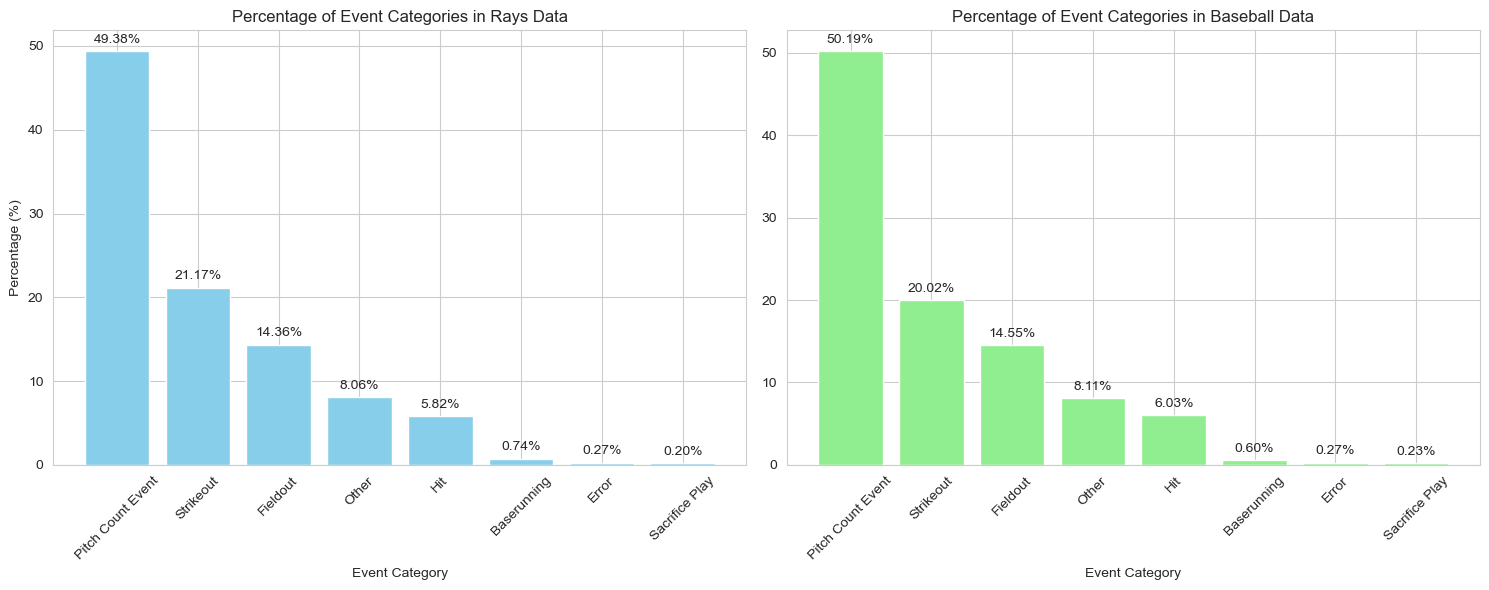

In [52]:

# Define the categories
# Define the new categories based on the suggestions
strikeout_events = ["strikeout", "strikeout_double_play"]

fieldout_events = [
    "field_out", "grounded_into_double_play", "force_out", "fielders_choice_out", 
    "fielders_choice", "double_play"
]

sacrifice_plays = ["sac_fly", "sac_bunt", "sac_fly_double_play"]

hits = ["single", "double", "triple", "homerun"]

pitch_count_events = [
    "ball", "called_strike", "foul", "swinging_strike", "swinging_strike_blocked", 
    "pitchout", "missed_bunt"
]

baserunning_events = [
    "stolen_base_2b", "stolen_base_3b", "stolen_base_home", "caught_stealing_2b", 
    "caught_stealing_3b", "caught_stealing_home", "wild_pitch", "passed_ball", 
    "defensive_indiff", "pickoff_caught_stealing_2b", "other_advance"
]

errors = ["field_error", "catcher_interf"]

# Function to categorize each event
def categorize_event(event):
    if event in strikeout_events:
        return 'Strikeout'
    elif event in fieldout_events:
        return 'Fieldout'
    elif event in sacrifice_plays:
        return 'Sacrifice Play'
    elif event in hits:
        return 'Hit'
    elif event in pitch_count_events:
        return 'Pitch Count Event'
    elif event in baserunning_events:
        return 'Baserunning'
    elif event in errors:
        return 'Error'
    else:
        return 'Other'

# Apply the categorization to the DataFrame
rays_df['event_category'] = rays_df['eventtype'].apply(categorize_event)
red_sox['event_category'] = red_sox['eventtype'].apply(categorize_event)
baseball_df['event_category'] = baseball_df['eventtype'].apply(categorize_event)

# Calculate percentages for each category in rays_df
rays_event_counts = rays_df['event_category'].value_counts(normalize=True) * 100

# Calculate percentages for each category in baseball_df
baseball_event_counts = baseball_df['event_category'].value_counts(normalize=True) * 100

# Calculate percentages for each category in red_sox
red_sox_event_counts = red_sox['event_category'].value_counts(normalize=True) * 100


# Plotting the comparison
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Rays data plot
ax[0].bar(rays_event_counts.index, rays_event_counts.values, color='skyblue')
ax[0].set_xlabel('Event Category')
ax[0].set_ylabel('Percentage (%)')
ax[0].set_title('Percentage of Event Categories in Rays Data')
ax[0].tick_params(axis='x', rotation=45)

# Adding percentages as text labels for Rays data
for i, value in enumerate(rays_event_counts.values):
    ax[0].text(i, value + 1, f'{value:.2f}%', ha='center')
     
    
# Baseball data plot
ax[1].bar(baseball_event_counts.index, baseball_event_counts.values, color='lightgreen')
ax[1].set_xlabel('Event Category')
ax[1].set_title('Percentage of Event Categories in Baseball Data')
ax[1].tick_params(axis='x', rotation=45)

# Adding percentages as text labels for Baseball data
for i, value in enumerate(baseball_event_counts.values):
    ax[1].text(i, value + 1, f'{value:.2f}%', ha='center')
    
# # Other team's data plot
# ax[2].bar(red_sox_event_counts.index, red_sox_event_counts.values, color='skyblue')
# ax[2].set_xlabel('Event Category')
# ax[2].set_ylabel('Percentage (%)')
# ax[2].set_title('Percentage of Event Categories in Other Team Data')
# ax[2].tick_params(axis='x', rotation=45)
# 
# # Adding percentages as text labels for other team's data
# for i, value in enumerate(red_sox_event_counts.values):
#     ax[2].text(i, value + 1, f'{value:.2f}%', ha='center')
    
plt.tight_layout()
plt.show()

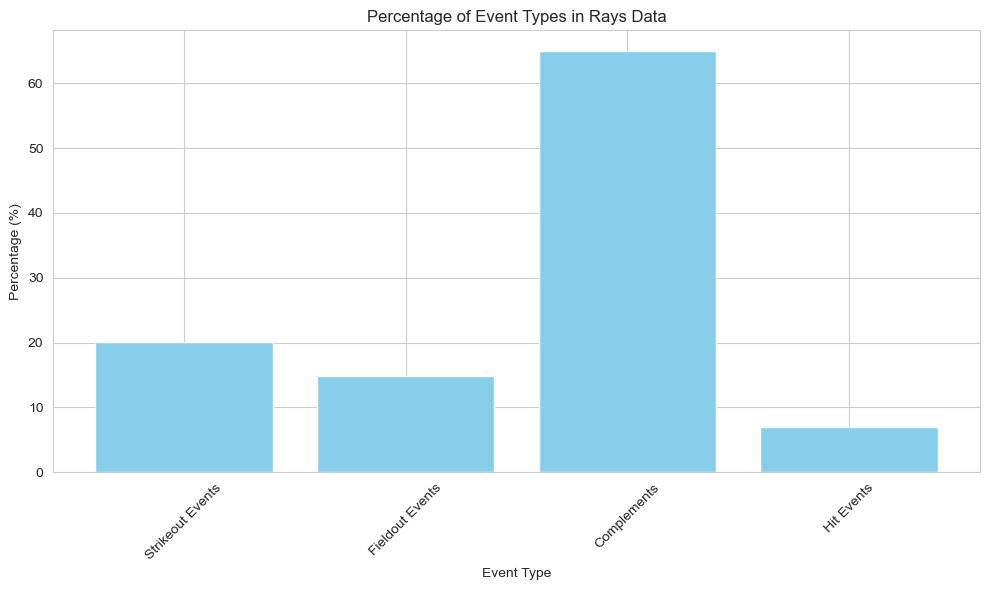

In [47]:
# import pandas as pd
import matplotlib.pyplot as plt

# Define the categories
strikeout_events = ["strikeout", "strikeout_double_play"]

fieldout_events = ["field_out", "grounded_into_double_play", "force_out", 
                   "fielders_choice_out", "fielders_choice", "double_play", 
                   "sac_fly", "sac_bunt", "sac_fly_double_play", "triple_play"]

complements = ["ball", "single", "blocked_ball", "foul", "walk", "force_out", 
               "wild_pitch", "stolen_base_2b", "homerun", "hit_by_pitch", 
               "double", "triple", "field_error", "stolen_base_3b", 
               "passed_ball", "caught_stealing_2b", "defensive_indiff", 
               "caught_stealing_3b", "pitchout", "swinging_strike_blocked", 
               "swinging_strike", "pickoff_caught_stealing_2b", "missed_bunt", 
               "caught_stealing_home", "other_advance", "called_strike", 
               "stolen_base_home", "catcher_interf"]

hit = ["single", "homerun", "double", "triple", "home_run"]

# Count the occurrences of each event type in the 'eventtype' column
total_events = len(baseball_df)
strikeout_count = baseball_df[baseball_df['eventtype'].isin(strikeout_events)].shape[0]
fieldout_count = baseball_df[baseball_df['eventtype'].isin(fieldout_events)].shape[0]
complements_count = baseball_df[baseball_df['eventtype'].isin(complements)].shape[0]
hit_count =  baseball_df[baseball_df['eventtype'].isin(hit)].shape[0]

# Calculate the percentages
strikeout_percentage = (strikeout_count / total_events) * 100
fieldout_percentage = (fieldout_count / total_events) * 100
complements_percentage = (complements_count / total_events) * 100
hit_percentage = (hit_count / total_events) * 100

# Create a dictionary for easy plotting
percentages = {
    'Strikeout Events': strikeout_percentage,
    'Fieldout Events': fieldout_percentage,
    'Complements': complements_percentage,
    'Hit Events': hit_percentage
}

# Plotting the percentages using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(percentages.keys(), percentages.values(), color='skyblue')
plt.xlabel('Event Type')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Event Types in Rays Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
baseball_df['pitcher'].value_counts()

pitcher
Mahle, Tyler         3192
Ray, Robbie          3099
Manaea, Sean         3093
Wheeler, Zack        3000
Castillo, Luis       2967
                     ... 
Arroyo, Christian       3
Romine, Andrew          3
Holt, Brock             3
Gonzalez, Romy          3
Turner, Justin          3
Name: count, Length: 889, dtype: int64

In [54]:
baseball_df.columns

Index(['gameid', 'GameDate', 'Date', 'Time', 'ab', 'pitchnum', 'inning',
       'teambat', 'balls', 'strikes', 'outs', 'pitcher', 'pitcherthrows',
       'batter', 'batterside', 'pitchresult', 'pitchresult_desc', 'eventtype',
       'pitchname', 'pitchname_desc', 'spinrate', 'relspeed', 'horzbreak',
       'inducedvertbreak', 'platelocside', 'platelocheight', 'hometeam_id',
       'Home', 'awayteam_id', 'Visitor', 'venue_id', 'venue_name',
       'event_category'],
      dtype='object')

## Defining High Pressure (for batters) in our scenario as the count containing 2 strikes 

In [69]:
high_pressure_df = baseball_df[(baseball_df['strikes'] == 2.0) & 
                               (baseball_df['balls'].isin([0, 1])) & 
                               (baseball_df['pitcherthrows'] == 'R')].copy()

In [70]:
high_pressure_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name,event_category
97300,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,2,4,1.0,0,1.0,2.0,...,4.379483,-0.529703,0.398841,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,Pitch Count Event
97300,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,2,4,1.0,0,1.0,2.0,...,4.379483,-0.529703,0.398841,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,Pitch Count Event
97300,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,2,4,1.0,0,1.0,2.0,...,4.379483,-0.529703,0.398841,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,Pitch Count Event
97293,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,4,3,1.0,0,0.0,2.0,...,-16.031368,-0.488700,1.254835,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,Pitch Count Event
97293,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,4,3,1.0,0,0.0,2.0,...,-16.031368,-0.488700,1.254835,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,Pitch Count Event
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697016,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,58,4,8.0,1,1.0,2.0,...,-15.589659,1.358258,-0.218744,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium,Pitch Count Event
697016,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,58,4,8.0,1,1.0,2.0,...,-15.589659,1.358258,-0.218744,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium,Pitch Count Event
536050,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,4,9.0,1,1.0,2.0,...,11.462074,-1.921934,3.071086,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium,Pitch Count Event
536050,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,4,9.0,1,1.0,2.0,...,11.462074,-1.921934,3.071086,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium,Pitch Count Event


In [76]:
high_pressure_df["eventtype"].unique()

array(['ball', 'strikeout', 'foul', 'single', 'blocked_ball', 'field_out',
       'home_run', 'force_out', 'double_play', 'stolen_base_2b', 'double',
       'sac_fly', 'grounded_into_double_play', 'wild_pitch', 'triple',
       'hit_by_pitch', 'sac_bunt', 'field_error', 'passed_ball',
       'caught_stealing_2b', 'defensive_indiff', 'catcher_interf',
       'pitchout', 'fielders_choice', 'strikeout_double_play',
       'fielders_choice_out', 'swinging_strike_blocked', 'stolen_base_3b',
       'pickoff_caught_stealing_2b', 'swinging_strike',
       'caught_stealing_home', 'other_advance', 'stolen_base_home',
       'missed_bunt', 'called_strike'], dtype=object)

## Redoing the eventtype column to reflect our groupings

In [84]:
# Define the lists
strikeout_events = ["strikeout", "strikeout_double_play"]
fieldout_events = ["field_out", "grounded_into_double_play", "force_out", 
                   "fielders_choice_out", "fielders_choice", "double_play", 
                   "sac_fly", "sac_bunt", "sac_fly_double_play", "triple_play"]
complements = ["ball", "single", "blocked_ball", "foul", "walk", "force_out", 
               "wild_pitch", "stolen_base_2b", "homerun", "hit_by_pitch", 
               "double", "triple", "field_error", "stolen_base_3b", 
               "passed_ball", "caught_stealing_2b", "defensive_indiff", 
               "caught_stealing_3b", "pitchout", "swinging_strike_blocked", 
               "swinging_strike", "pickoff_caught_stealing_2b", "missed_bunt", 
               "caught_stealing_home", "other_advance", "called_strike", 
               "stolen_base_home", "catcher_interf"]
hit = ["single", "homerun", "double", "triple", "home_run", ]

# Create a mapping dictionary
mapping = {}

# Map the events to their respective categories
for event in strikeout_events:
    mapping[event] = "strikeout"

for event in fieldout_events:
    mapping[event] = "fieldout"

for event in complements:
    mapping[event] = "complement"

for event in hit:
    mapping[event] = "hit"

# Apply the mapping to the 'eventtype' column in your dataframe
high_pressure_df['eventtype'] = high_pressure_df['eventtype'].replace(mapping)

# Check the result
print(high_pressure_df['eventtype'].value_counts())

eventtype
complement    151875
strikeout      48408
fieldout       29643
hit            14118
Name: count, dtype: int64


In [88]:
from scipy.stats import f_oneway
from statsmodels.stats.multitest import multipletests

# Define the pitch characteristics you want to analyze
pitch_features = ['spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 'platelocside']

# Store p-values for correction
p_values = []

# Conduct ANOVA for each feature
for feature in pitch_features:
    # Group the feature by eventtype
    groups = [group[feature].values for name, group in high_pressure_df.groupby('eventtype')]
    
    # Perform ANOVA
    f_stat, p_value = f_oneway(*groups)
    p_values.append(p_value)
    
    # Print the ANOVA result without correction
    print(f"ANOVA for {feature}: F-statistic = {f_stat:.2f}, p-value = {p_value:.9f}")

# Apply Benjamini-Hochberg correction
reject, corrected_p_values, _, _ = multipletests(p_values, method='fdr_bh')

# Print the corrected p-values
import decimal

# Print p-values with high precision
for feature, p_value in zip(pitch_features, p_values):
    print(f"ANOVA for {feature}: p-value = {decimal.Decimal(p_value):.30f}")


ANOVA for spinrate: F-statistic = 164.02, p-value = 0.000000000
ANOVA for relspeed: F-statistic = 85.71, p-value = 0.000000000
ANOVA for horzbreak: F-statistic = 113.28, p-value = 0.000000000
ANOVA for inducedvertbreak: F-statistic = 104.65, p-value = 0.000000000
ANOVA for platelocside: F-statistic = 584.53, p-value = 0.000000000
ANOVA for spinrate: p-value = 0.000000000000000000000000000000
ANOVA for relspeed: p-value = 0.000000000000000000000000000000
ANOVA for horzbreak: p-value = 0.000000000000000000000000000000
ANOVA for inducedvertbreak: p-value = 0.000000000000000000000000000000
ANOVA for platelocside: p-value = 0.000000000000000000000000000000


In [89]:
# Calculate summary statistics for each feature grouped by eventtype
for feature in pitch_features:
    print(f"Summary statistics for {feature} by eventtype:")
    summary_stats = high_pressure_df.groupby('eventtype')[feature].describe()
    print(summary_stats)
    print("\n")


Summary statistics for spinrate by eventtype:
               count         mean         std         min          25%  \
eventtype                                                                
complement  151875.0  2275.718757  379.117156    5.205169  2108.015137   
fieldout     29643.0  2265.793438  384.765137  190.743759  2090.485352   
hit          14118.0  2249.818554  372.478888  335.904907  2074.009521   
strikeout    48408.0  2312.087438  387.321131   86.462303  2140.204956   

                    50%          75%          max  
eventtype                                          
complement  2306.855957  2495.470703  3598.551514  
fieldout    2295.024414  2488.887695  3549.343750  
hit         2279.106324  2463.909668  3529.706055  
strikeout   2343.692382  2534.469177  3589.140869  


Summary statistics for relspeed by eventtype:
               count       mean       std        min        25%        50%  \
eventtype                                                              

In [86]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA

# Define the dependent variables (pitch characteristics)
dependent_vars = ['spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 'platelocside']

# Fit MANOVA model
manova = MANOVA.from_formula(' + '.join(dependent_vars) + ' ~ eventtype', data=high_pressure_df)

# Get results
manova_results = manova.mv_test()
print(manova_results)

                       Multivariate linear model
                                                                        
------------------------------------------------------------------------
       Intercept         Value   Num DF    Den DF      F Value    Pr > F
------------------------------------------------------------------------
          Wilks' lambda   0.0030 5.0000 244036.0000 16074809.3153 0.0000
         Pillai's trace   0.9970 5.0000 244036.0000 16074809.3153 0.0000
 Hotelling-Lawley trace 329.3532 5.0000 244036.0000 16074809.3153 0.0000
    Roy's greatest root 329.3532 5.0000 244036.0000 16074809.3153 0.0000
------------------------------------------------------------------------
                                                                        
-------------------------------------------------------------------------
         eventtype         Value    Num DF     Den DF    F Value   Pr > F
-------------------------------------------------------------------------

## Crude Decision Tree

Accuracy: 0.31
              precision    recall  f1-score   support

  complement       0.85      0.34      0.49     45486
    fieldout       0.14      0.09      0.11      8902
         hit       0.09      0.69      0.15      4282
   strikeout       0.25      0.26      0.25     14544

    accuracy                           0.31     73214
   macro avg       0.33      0.34      0.25     73214
weighted avg       0.60      0.31      0.37     73214



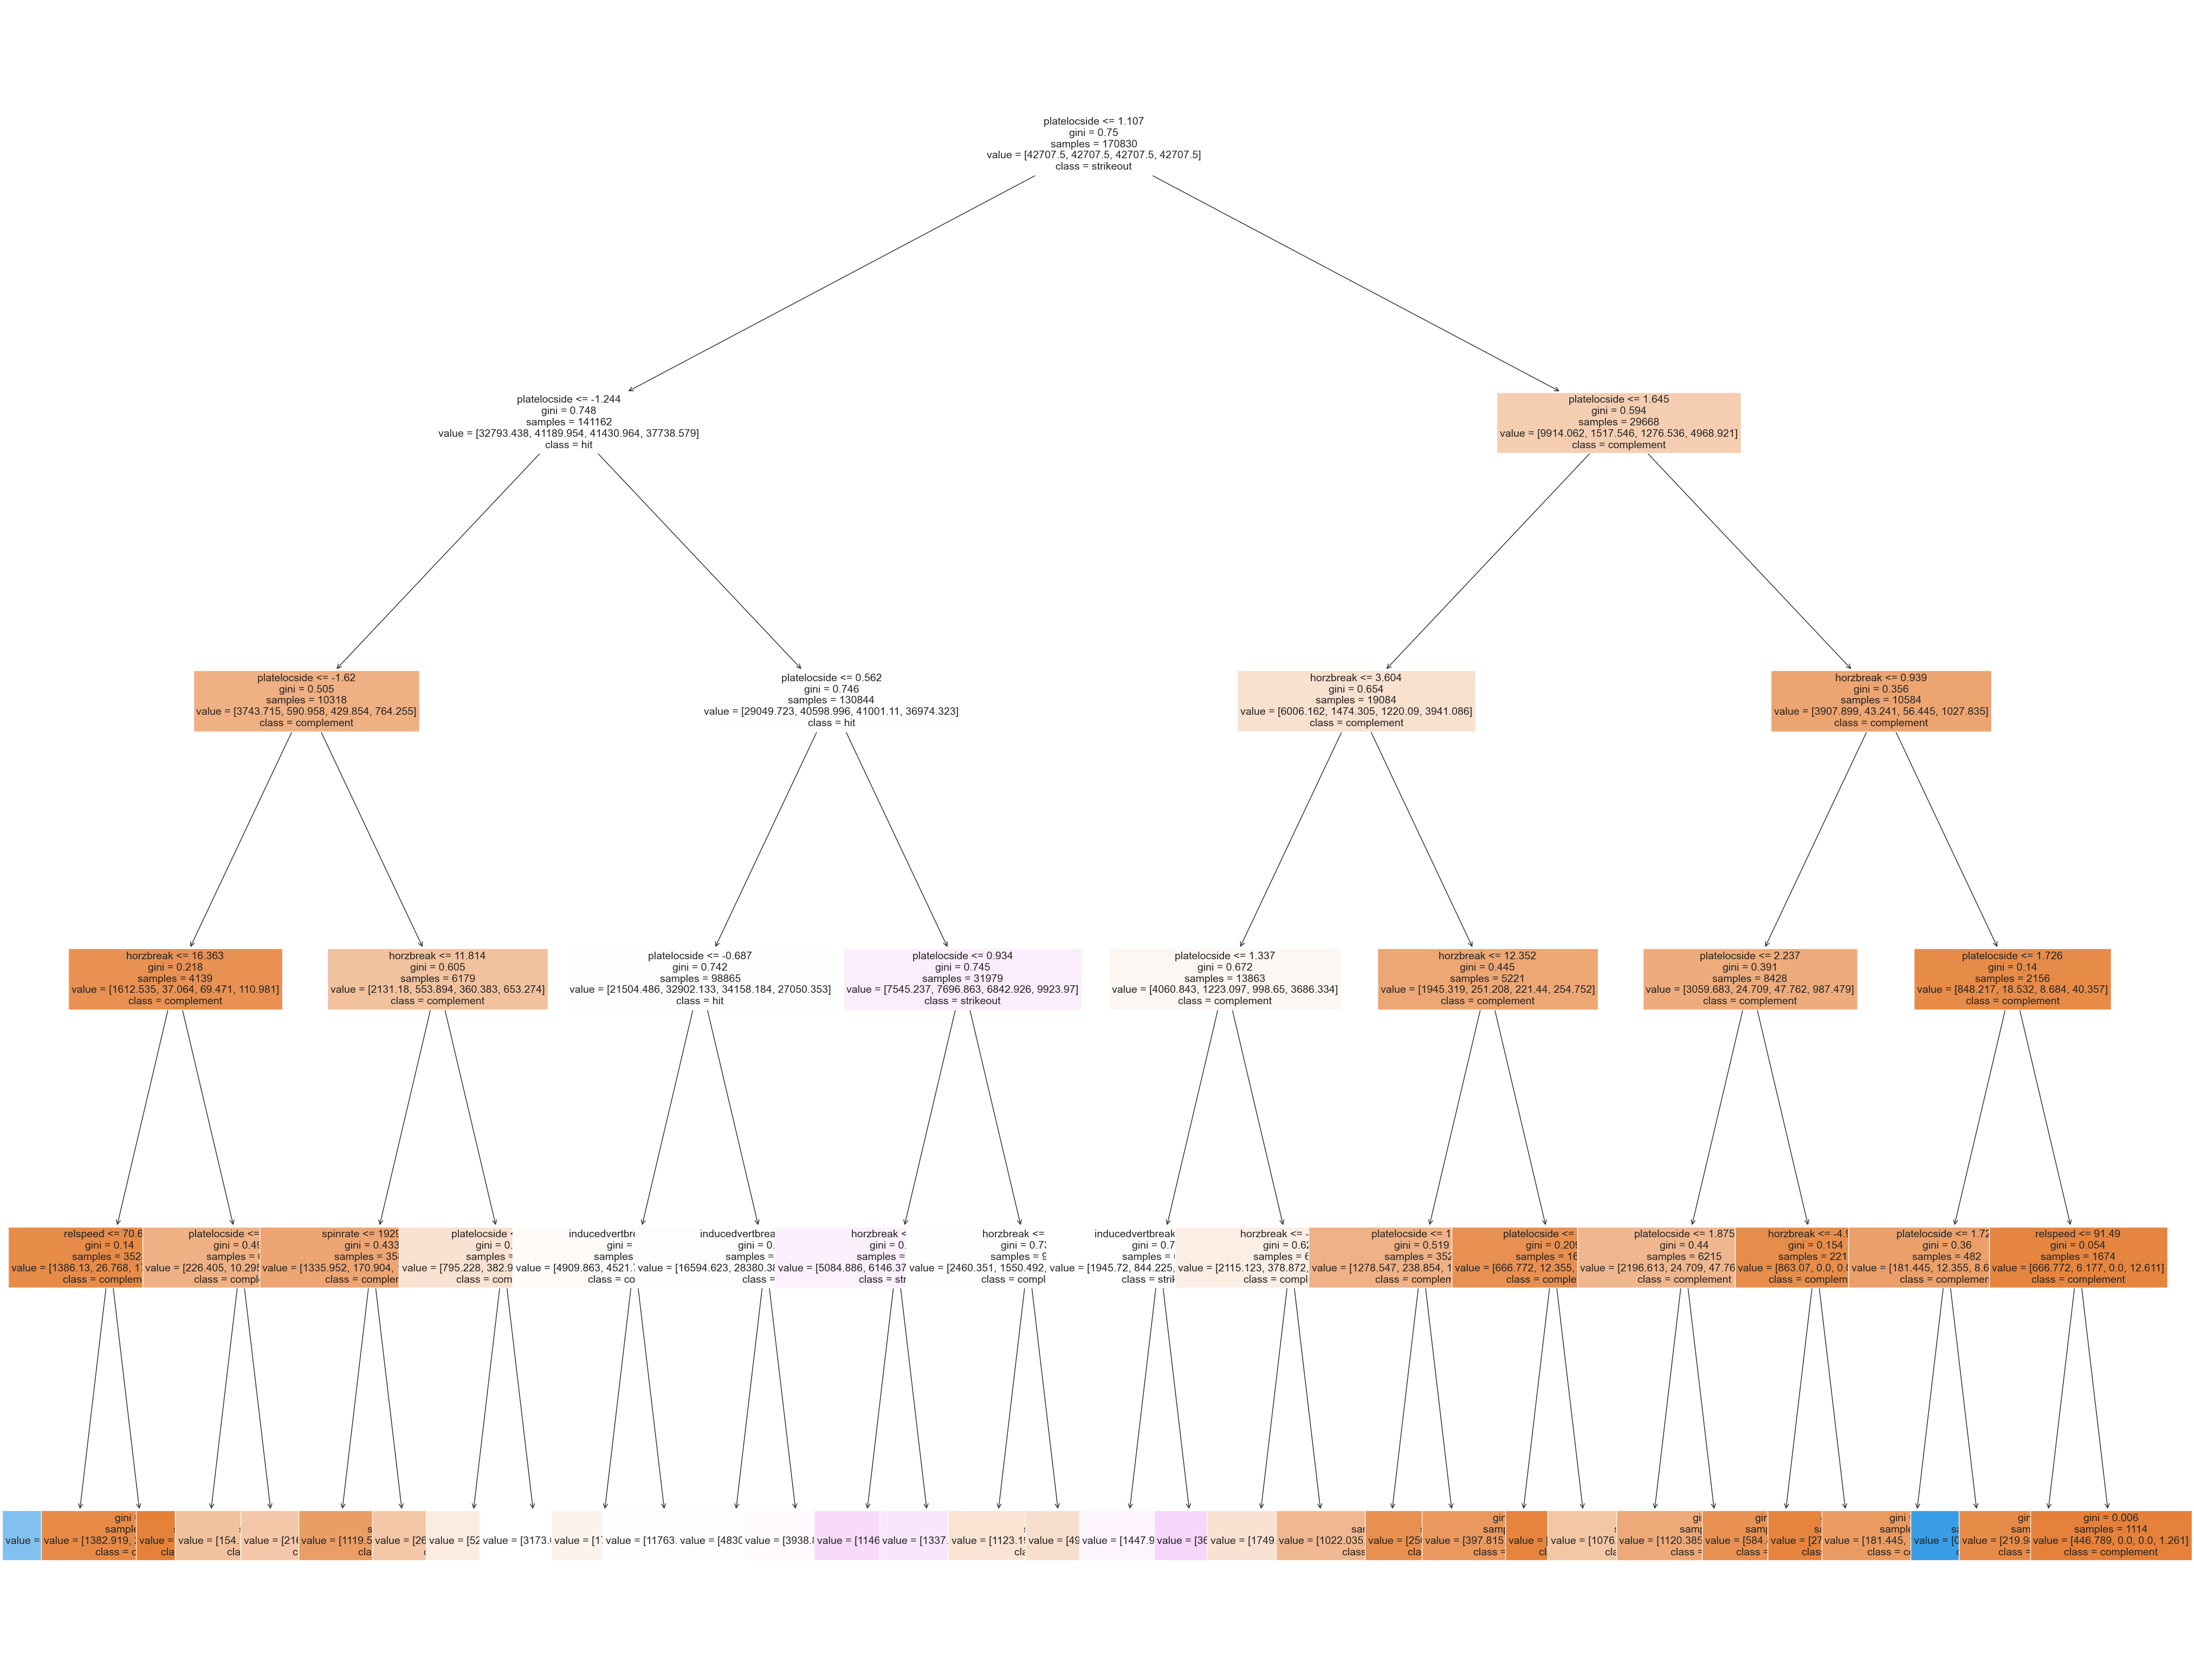

In [105]:
filtered_df = high_pressure_df

# Define the features (pitch characteristics) and target (eventtype)
features = ['spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 'platelocside']
target = 'eventtype'

X = filtered_df[features]
y = filtered_df[target]

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = clf.predict(X_test)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert the class names to a list
class_names = list(clf.classes_)

# Set a much larger figure size and increase font size
plt.figure(figsize=(50, 40))  # Even larger figure
plot_tree(clf, feature_names=features, class_names=class_names, filled=True, fontsize=14)  # Increase font size to 14

plt.show()



In [103]:
class_names

['complement', 'fieldout', 'hit', 'strikeout']

## Explore What the Most Common Pitches are in a 2-Count Strike

## Just Looking at strikeouts and fieldouts - Do we find any significant differences in their appearances based on our chosen characteristics? 

In [58]:
high_pressure_df['eventtype'].value_counts()

eventtype
complement    369519
strikeout     125631
fieldout       88596
hit            43710
Name: count, dtype: int64

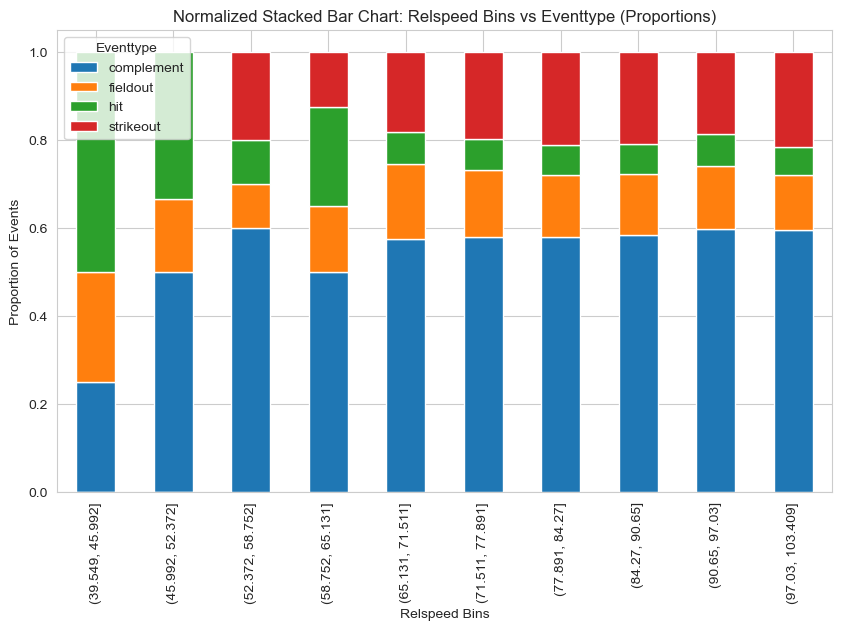

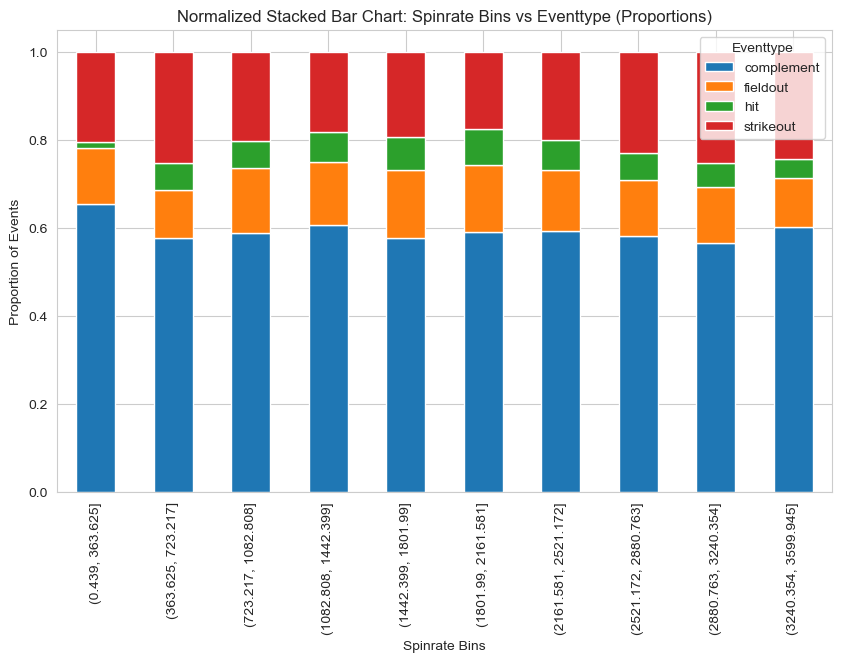

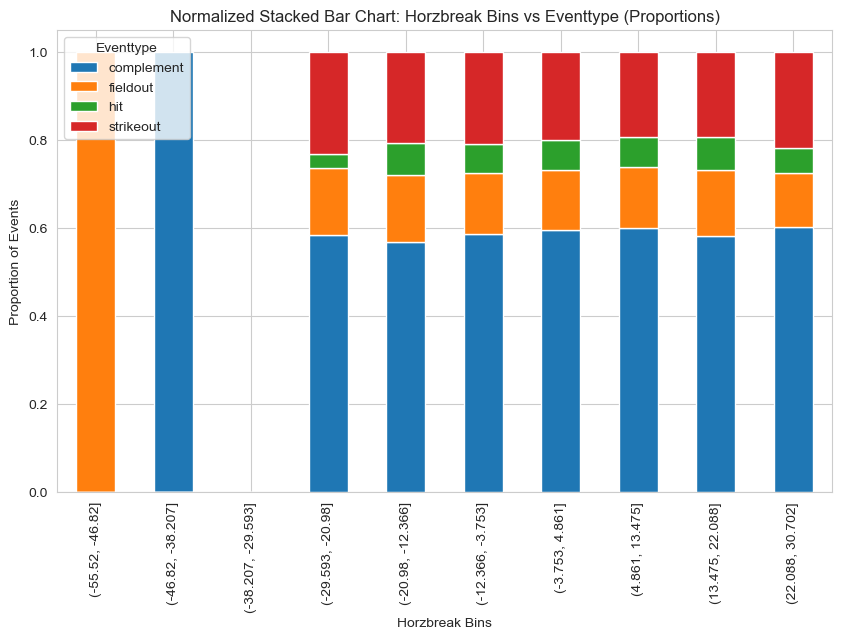

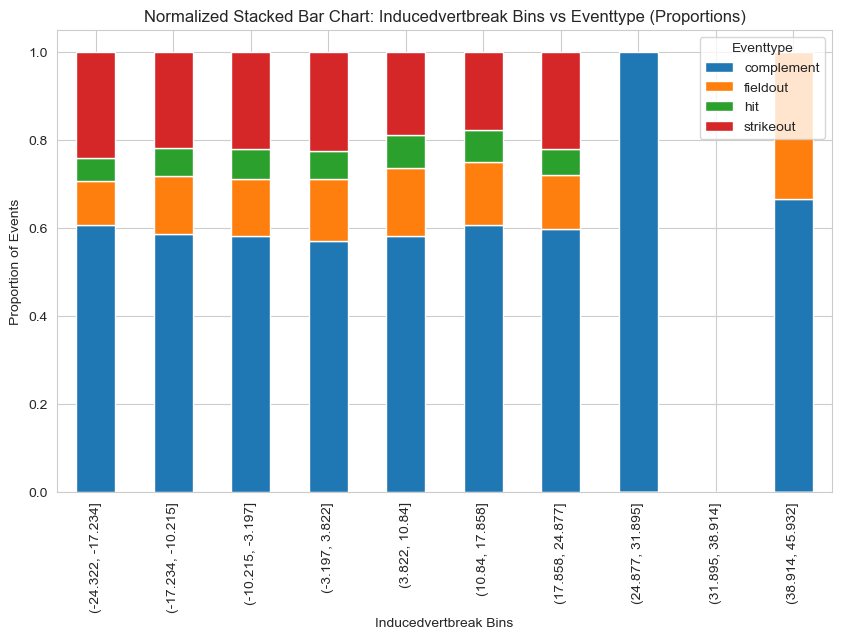

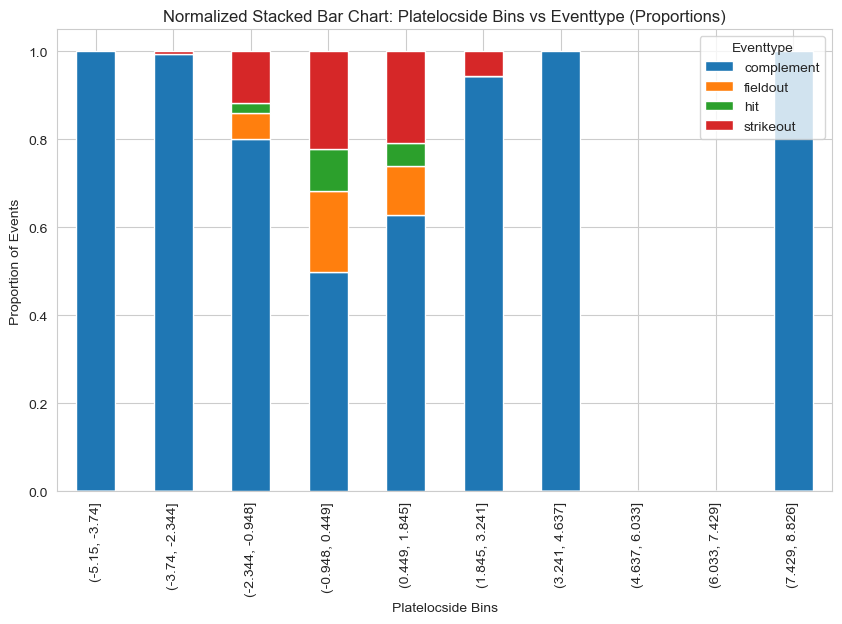

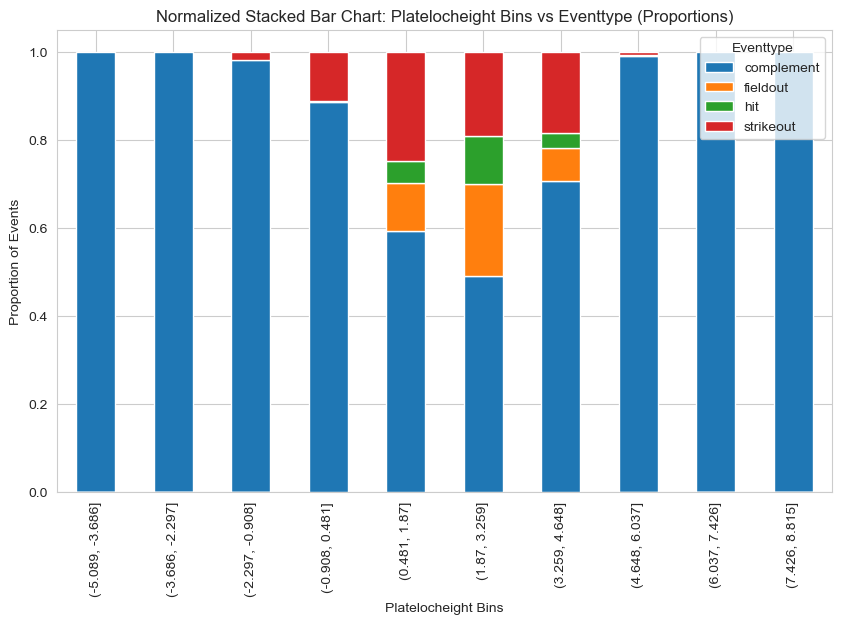

In [59]:
characteristics = [ 'relspeed', 'spinrate', 'horzbreak', 'inducedvertbreak', 'platelocside', 'platelocheight']

for characteristic in characteristics:
    plot_normalized_stacked_bar(high_pressure_df, characteristic, 'eventtype', bins=10)

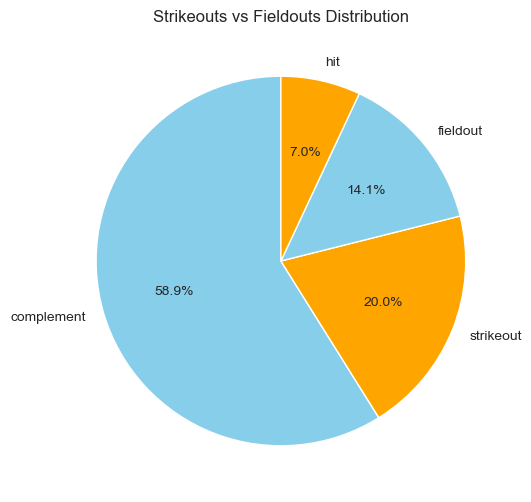

In [60]:
# Count of strikeouts and fieldouts
eventtype_counts = high_pressure_df['eventtype'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(eventtype_counts, labels=eventtype_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Strikeouts vs Fieldouts Distribution')
plt.show()

## Trying to Fit a Logistic Regression Model to our data

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import statsmodels.api as sm

# Assuming your DataFrame is df and 'eventtype' is your target variable

# Convert eventtype to a binary variable (1 for 'strikeout', 0 for 'fieldout')
high_pressure_df['eventtype_binary'] = high_pressure_df['eventtype'].apply(lambda x: 1 if x == 'strikeout' else 0)

# Select the characteristics
characteristics = [#'relspeed',
    'spinrate', 'horzbreak', #'inducedvertbreak'
    'platelocside', 'platelocheight']

# Check for missing values and fill/drop if necessary
df = high_pressure_df.dropna(subset=characteristics)

# Split data into features (X) and target (y)
X = df[characteristics]
y = df['eventtype_binary']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [62]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc}")

              precision    recall  f1-score   support

           0       0.80      1.00      0.89    150684
           1       0.00      0.00      0.00     37553

    accuracy                           0.80    188237
   macro avg       0.40      0.50      0.44    188237
weighted avg       0.64      0.80      0.71    188237

ROC AUC Score: 0.5368262966057143


/Users/nathanglen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Our Models perform poorly given just our pitch characteristics and Strikeout/Fieldout, this could suggest a bunch of things, some that I can think of: 
- Our pitch characteristics may just have relationships that cannot be captured with logistic regression
- Fieldouts/Strikeouts are just too similar and there's no real difference in what pitches result in any specific type of out
- Our data just isn't specific enough to look into a question that looks at Strike**outs** and Field**outs**

## Moving Forward - Trying to Get more Narrow

In [63]:
high_pressure_df = baseball_df[(baseball_df['strikes'] == 2.0) & ((baseball_df['balls'] == 0) | (baseball_df['balls'] == 1))].copy()

In [64]:
high_pressure_df['eventtype'].value_counts()

eventtype
ball                          123243
foul                           70914
strikeout                      68616
field_out                      39267
blocked_ball                   13827
single                         13797
double                          3804
force_out                       2364
home_run                        2319
grounded_into_double_play       1857
hit_by_pitch                    1596
wild_pitch                      1458
stolen_base_2b                   921
field_error                      780
sac_fly                          516
triple                           348
fielders_choice                  240
double_play                      213
sac_bunt                         195
caught_stealing_2b               174
passed_ball                      135
fielders_choice_out              129
stolen_base_3b                    81
strikeout_double_play             66
defensive_indiff                  66
catcher_interf                    48
swinging_strike             

In [65]:
# Ensure 'eventtype' is a string, in case of mixed types
high_pressure_df['eventtype'] = high_pressure_df['eventtype'].astype(str)

fieldout_types = ['field_out', 'force_out', 'grounded_into_double_play', 'fielders_choice_out', 'fielders_choice', 'double_play', 'sac_fly', 'sac_bunt', 'sac_fly_double_play', 'triple_play']

strikeout_types = ['strikeout', 'strikeout_double_play']

high_pressure_df['outcome'] = high_pressure_df['eventtype'].apply(
    lambda x: 'Strikeout' if x in strikeout_types 
              else 'Fieldout' if x in fieldout_types 
              else 'Other'
)


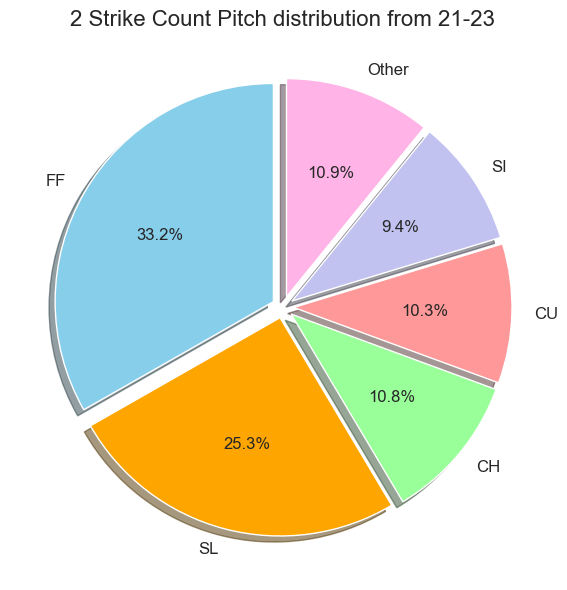

In [99]:
import matplotlib.pyplot as plt

# Count of strikeouts and fieldouts
eventtype_counts = high_pressure_df['pitchname'].value_counts()

# Define the threshold for grouping less frequent categories into "Other"
threshold = 0.05 * eventtype_counts.sum()  # 5% threshold

# Group small categories into "Other"
small_categories = eventtype_counts[eventtype_counts < threshold]
eventtype_counts_aggregated = eventtype_counts[eventtype_counts >= threshold]
eventtype_counts_aggregated['Other'] = small_categories.sum()

# Plot pie chart with improvements
plt.figure(figsize=(6, 6))
colors = ['skyblue', 'orange', '#99ff99', '#ff9999', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffb380']  # Adjusted color palette
explode = [0.05] * len(eventtype_counts_aggregated)  # Slightly explode each slice

# Create pie chart
plt.pie(eventtype_counts_aggregated, labels=eventtype_counts_aggregated.index, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode, shadow=True, textprops={'fontsize': 12})

plt.title('2 Strike Count Pitch distribution from 21-23', fontsize=16)
plt.tight_layout()
plt.show()


In [67]:
high_pressure_df = high_pressure_df[high_pressure_df['eventtype'].isin(['field_out', 'ball'])]
high_pressure_df = high_pressure_df[high_pressure_df['pitchname'].isin(['FF'])]

In [ ]:
high_pressure_df['eventtype'].unique()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming your dataframe is high_pressure_df and these are the columns to scale
columns_to_scale = [ 'relspeed', 'spinrate', 'horzbreak', 'inducedvertbreak', 'platelocside', 'platelocheight']

# Initialize the MinMaxScaler with the feature_range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform the selected columns
scaled_values = scaler.fit_transform(high_pressure_df[columns_to_scale])

# Create a copy of the original dataframe
scaled_df = high_pressure_df.copy()

# Replace the original columns with the scaled values
scaled_df[columns_to_scale] = scaled_values

# Display the first few rows of the new dataframe with scaled values
scaled_df.head()


## Just for fun, making pair plots to look at the expression ranges for each pitch characteristic for only two eventtypes, (fieldout and ball) 
- it seems like they both have  a similar distribution - ball just overall has way more variance and that makes sense because outs are going to be pretty precise 

In [ ]:
sns.pairplot(high_pressure_df, hue='eventtype', vars=['spinrate', 'horzbreak', 'inducedvertbreak', 'relspeed'])